In [1]:
# Clean output files
!rm -rf /kaggle/working/*

In [2]:
#|default_exp app

In [3]:
# Make sure we've got the latest version of fastai:
!pip install -Uqq fastai gradio nbdev

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.3/235.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 31.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 97.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.9 MB/s eta 0

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr

def is_cat(x): return x[0].isupper()

In [5]:
path_train = untar_data(URLs.PETS)/'images'

dls_train = ImageDataLoaders.from_name_func('.',
    get_image_files(path_train), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'))

In [6]:
learn_train = vision_learner(dls_train, resnet18, metrics=error_rate)
learn_train.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 162MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.202674,0.101314,0.033153,00:19


epoch,train_loss,valid_loss,error_rate,time
0,0.083144,0.081931,0.024357,00:18
1,0.043355,0.082013,0.020974,00:18
2,0.014893,0.054362,0.015562,00:18


In [7]:
learn_train.save('model.pkl')

Path('models/model.pkl.pth')

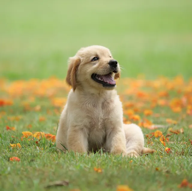

In [8]:
im = PILImage.create('/kaggle/input/inputdata/dog.jpg')
im.thumbnail((192,192))
im

In [9]:
#|export
path_test = untar_data(URLs.PETS)/'images'

dls_test = ImageDataLoaders.from_name_func('.',
    get_image_files(path_test), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192, method='squish'))

In [10]:
#|export
learn_test = vision_learner(dls_test, resnet18, metrics=error_rate)

In [11]:
#|export
learn_test.load('model.pkl')

In [12]:
learn_test.predict(im)

('False', tensor(0), tensor([1.0000e+00, 2.5295e-06]))

In [13]:
#|export
categories = ('Dog', 'Cat')

def classify_image(img):
    pred,idx,probs = learn_test.predict(img)
    return dict(zip(categories, map(float,probs)))

In [14]:
classify_image(im)

{'Dog': 0.9999974966049194, 'Cat': 2.529536004658439e-06}

In [15]:
#|export
image = gr.Image()
label = gr.Label()
examples = ['dog.jpg', 'cat.jpg', 'dunno.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

* Running on local URL:  http://127.0.0.1:7860
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://05f5db44739e8739a0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## end -

In [16]:
from nbdev.export import nb_export

In [17]:
# NB: This only works if you run all the cells in order - click "Save Version" to do this automatically
%notebook -e appMinima.ipynb

In [18]:
nb_export('appMinima.ipynb', '.')